In [1]:
import numpy as np
import datetime as dt
import glob
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as scs
from matplotlib.dates import DateFormatter
import sys
sys.path.append('D:\\gitCCA\\CESdesign\\py')
import CESfunctions_dev as cf


In [19]:
bg1=np.loadtxt("E:\\Ib2202031134.txt")
samples = np.load('E:\\Isamples2202031429.npy')
refe1=np.load("NO2ref_AvSC_corr.npy")
refe2=np.load("CHOCHO_AvSC_corr.npy")

lower_wavelength=445
upper_wavelength=459

minwave,maxwave=cf.segment_indices(samples,lower_wavelength,upper_wavelength)
lines=np.copy(samples[minwave:maxwave,:])
bckg=np.copy(bg1[minwave:maxwave,:])
ref1=np.copy(refe1[minwave:maxwave,:])
ref2=np.copy(refe2[minwave:maxwave,:])



In [25]:
a,b,c,d = cf.fit_signal_2ref(alpha,ref1,ref2)
print(a,b,c/2.5e10,d/2.5e10)

4.909873969350513e-06 -6.0490231905745756e-09 15.348699395342095 -7.875276625351798


383717484883.55237 -196881915633.79495
383717484883.55237 0


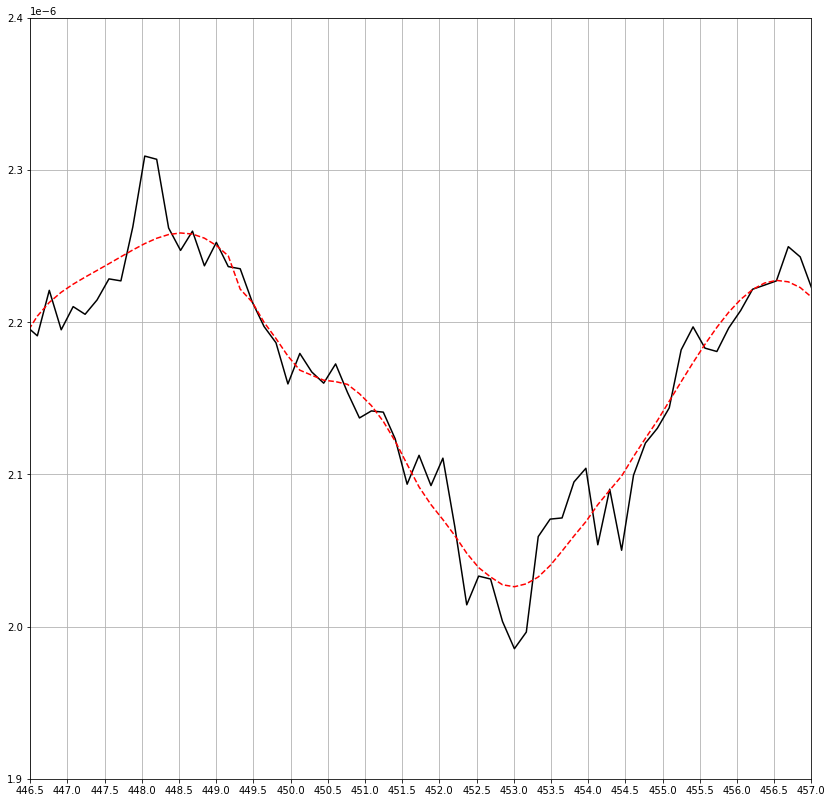

In [28]:
print(c,d)
if c<0 and d<0:
    print('here')
    c = 0
    d = 0
elif c < 0:
    c = 0
elif d < 0:
    d = 0

print(c,d)
residual = alpha - ref1[:,1]*c-ref2[:,1]*d
    
fl=scs.savgol_filter(residual, 51, 8)

f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(111)

ax1.plot(lines[:,0], residual,'-k',label="f(l)")
ax1.plot(lines[:,0], fl,'--r',label="f(l) filtered")
ax1.set_xlim(446.5,457)
ax1.set_xticks(np.arange(446.5,457.5,0.5))
ax1.set_ylim(1.9e-6,2.4e-6)
plt.grid()

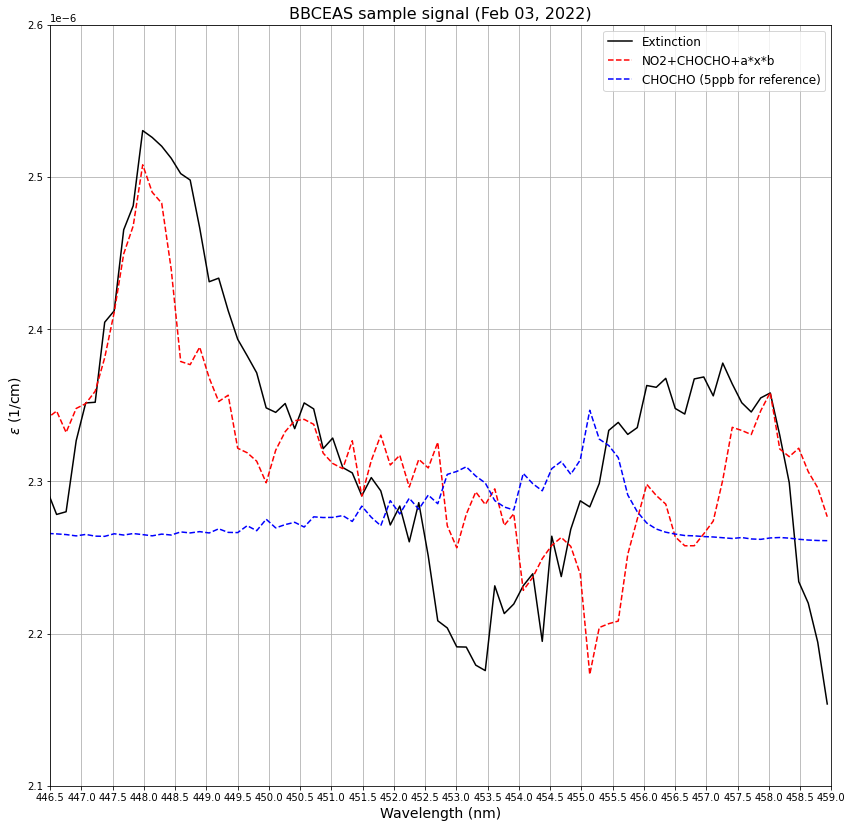

In [27]:
f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(111)

ax1.plot(ref1[:,0], alpha,'-k',label="Extinction")
ax1.plot(ref1[:,0], a+b*ref1[:,0]+ref1[:,1]*c+ref2[:,1]*d,'--r',label="NO2+CHOCHO+a*x*b")
ax1.plot(ref1[:,0], ref2[:,1]*5*2.5e10+2.26e-6,'--b',label="CHOCHO (5ppb for reference)")

ax1.set_xlim(446.5,459)
ax1.set_ylim(2.1e-6,2.6e-6)
ax1.set_xticks(np.arange(446.5,459.5,0.5))
ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('$\\epsilon$ (1/cm)',size=14)
ax1.set_title("BBCEAS sample signal (Feb 03, 2022)",size=16)
plt.grid()

In [30]:
a,b,c,d = cf.fit_signal_2ref(alpha-fl,ref1,ref2)
print(a,b,c/2.5e10,d/2.5e10)

1.33650555600927e-06 -2.883542695879806e-09 12.724502817832436 -0.6287171009784259


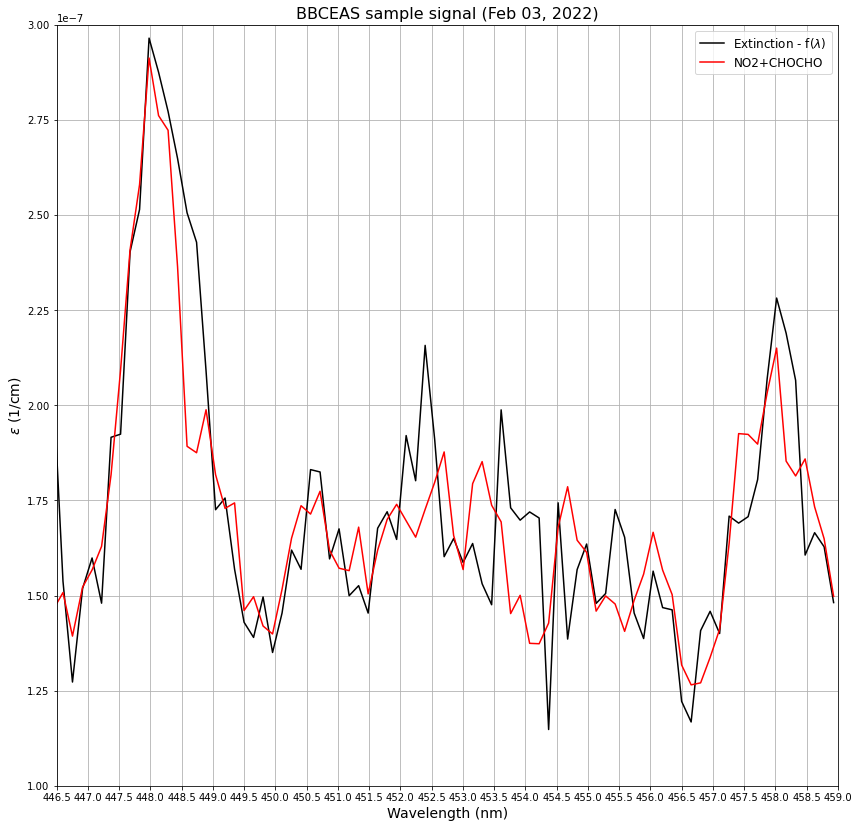

In [31]:
f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(111)

ax1.plot(ref1[:,0], alpha-fl,'-k',label="Extinction - f($\\lambda$)")
ax1.plot(ref1[:,0], ref1[:,1]*c+ref2[:,1]*d+3e-8,'-r',label="NO2+CHOCHO")


ax1.set_xlim(446.5,459)
ax1.set_ylim(1e-7,3e-7)
ax1.set_xticks(np.arange(446.5,459.5,0.5))
ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('$\\epsilon$ (1/cm)',size=14)
ax1.set_title("BBCEAS sample signal (Feb 03, 2022)",size=16)
plt.grid()

In [12]:
ax,bx,cx,dx = cf.fit_signal_w_fl(alpha,fl,ref1,ref2)
print(ax,bx,cx/2.5e10,dx/2.5e10)

3.847635714983444e-10 1.0141903445357203 12.815903878770808 -0.5855550160582593


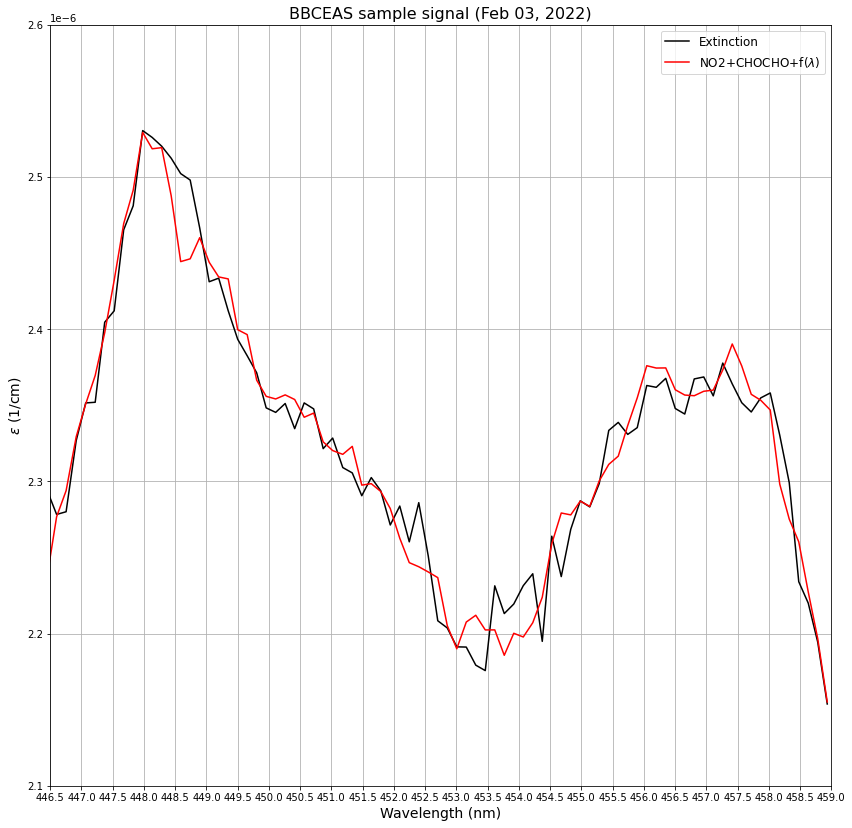

In [29]:
f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(111)

ax1.plot(ref1[:,0], alpha,'-k',label="Extinction")
ax1.plot(ref1[:,0], ax+fl*bx+ref1[:,1]*cx+ref2[:,1]*dx,'-r',label="NO2+CHOCHO+f($\\lambda$)")


ax1.set_xlim(446.5,459)
ax1.set_ylim(2.1e-6,2.6e-6)
ax1.set_xticks(np.arange(446.5,459.5,0.5))
ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('$\\epsilon$ (1/cm)',size=14)
ax1.set_title("BBCEAS sample signal (Feb 03, 2022)",size=16)
plt.grid()

In [ ]:
verbose = 1
alpha = cf.extinction(lines[:,121], np.average(bckg[:,1:],axis=1), 0.99955, 70)
a,b,c,d = cf.fit_signal_2ref(alpha,ref1,ref2)
density1 = c
density2 = d
if c<0 and d<0:
    print('here')
    c = 0
    d = 0
elif c < 0:
    c = 0
elif d < 0:
    d = 0
fl=cf.get_fl_broad(alpha,ref1,ref2,c,d,npoints=51,npoly=8)
a,b,c,d = cf.fit_signal_w_fl(alpha,fl,ref1,ref2)

if verbose == 1:
    print("First N1: ",density1/2.5e10," Second N1: ",c/2.5e10)
    print("First N2: ",density2/2.5e10," Second N2: ",d/2.5e10)


f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(111)

ax1.plot(ref1[:,0], alpha,'-k',label="Extinction")
ax1.plot(ref1[:,0], a+fl*b+ref1[:,1]*c+ref2[:,1]*d,'-r',label="NO2+CHOCHO+f($\\lambda$)")


ax1.set_xlim(446.5,459)
#ax1.set_ylim(1.7e-6,2.4e-6)
ax1.set_xticks(np.arange(446.5,459.5,0.5))
ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('$\\epsilon$ (1/cm)',size=14)
ax1.set_title("BBCEAS sample signal (Feb 03, 2022)",size=16)
plt.grid()

First N1:  15.348699395342095  Second N1:  12.815903878770808
First N2:  -7.875276625351798  Second N2:  -0.5855550160582593


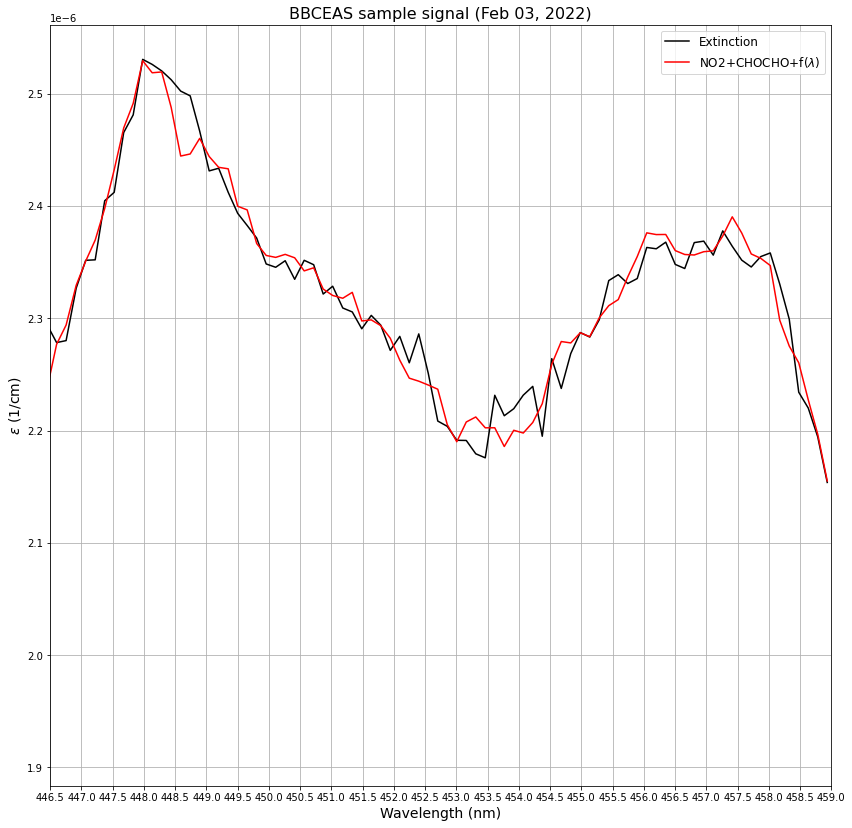

In [4]:
alpha,fl,a,b,c,d = cf.fit_alg_1(lines[:,121], np.average(bckg[:,1:],axis=1), 0.99955, 70,ref1,ref2,parameters=1)


f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(111)

ax1.plot(ref1[:,0], alpha,'-k',label="Extinction")
ax1.plot(ref1[:,0], a+fl*b+ref1[:,1]*c+ref2[:,1]*d,'-r',label="NO2+CHOCHO+f($\\lambda$)")


ax1.set_xlim(446.5,459)
#ax1.set_ylim(1.7e-6,2.4e-6)
ax1.set_xticks(np.arange(446.5,459.5,0.5))
ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('$\\epsilon$ (1/cm)',size=14)
ax1.set_title("BBCEAS sample signal (Feb 03, 2022)",size=16)
plt.grid()

In [ ]:
#####Background testing

In [17]:
samples = np.load('E:\\Isamples2202031429.npy') ####only to grab wavelengths

bg1n=np.loadtxt("E:\\backtest\\20220222\\Ib2202221442.txt")
bg2n=np.loadtxt("E:\\backtest\\20220222\\Ib2202221453.txt")
bg3n=np.loadtxt("E:\\backtest\\20220222\\Ib2202221504.txt")
bg4n=np.loadtxt("E:\\backtest\\20220222\\Ib2202221514.txt")

bg1w=np.loadtxt("E:\\backtest\\20220222\\Ib2202221529.txt")
bg2w=np.loadtxt("E:\\backtest\\20220222\\Ib2202221540.txt")
bg3w=np.loadtxt("E:\\backtest\\20220222\\Ib2202221550.txt")
bg4w=np.loadtxt("E:\\backtest\\20220222\\Ib2202221602.txt")
bg5w=np.loadtxt("E:\\backtest\\20220222\\Ib2202221613.txt")


refe1=np.load("NO2ref_AvSC_corr.npy")
refe2=np.load("CHOCHO_AvSC_corr.npy")

lower_wavelength=445
upper_wavelength=459

minwave,maxwave=cf.segment_indices(samples,lower_wavelength,upper_wavelength)

ref1=np.copy(refe1[minwave:maxwave,:])
ref2=np.copy(refe2[minwave:maxwave,:])

bkgsn = [bg1n,bg2n,bg3n,bg4n]
bgsn = []
for ele in bkgsn:
    bgsn.append(np.copy(ele[minwave:maxwave,:]))

bkgsw = [bg1w,bg2w,bg3w,bg4w]
bgsw = []
for ele in bkgsw:
    bgsw.append(np.copy(ele[minwave:maxwave,:]))

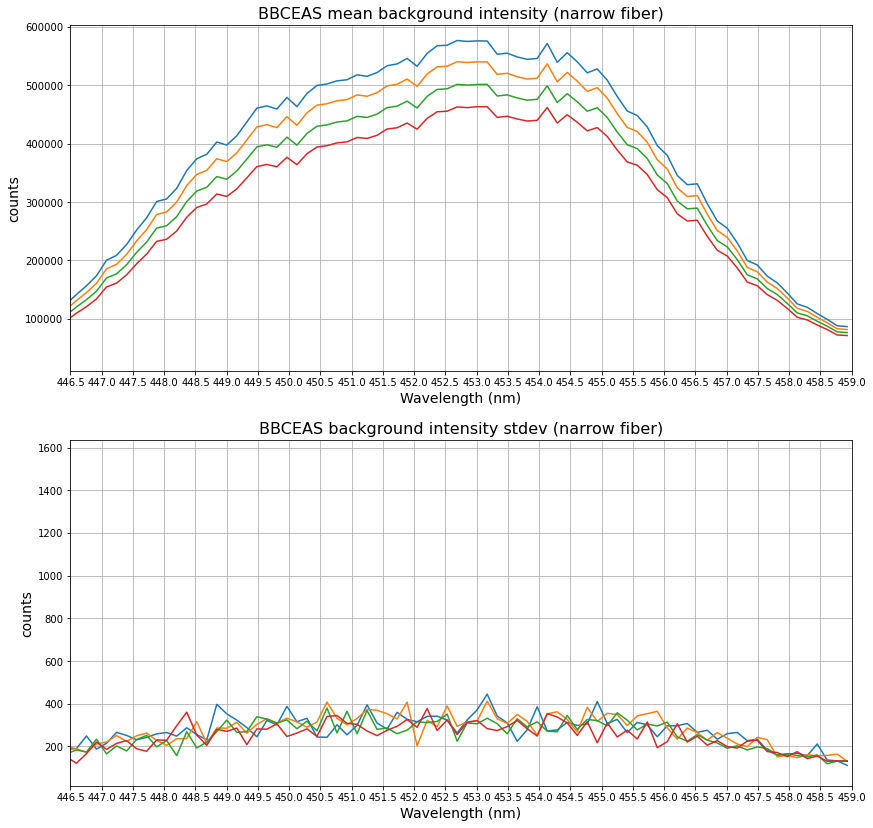

In [13]:
f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(211)

for ele in bgsn:
    ax1.plot(ele[:,0],np.average(ele[:,1:],axis=1))


ax1.set_xlim(446.5,459)
#ax1.set_ylim(1.7e-6,2.4e-6)
ax1.set_xticks(np.arange(446.5,459.5,0.5))
#ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('counts',size=14)
ax1.set_title("BBCEAS mean background intensity (narrow fiber)",size=16)
plt.grid()

ax2 = f.add_subplot(212)

for ele in bgsn:
    ax2.plot(ele[:,0],np.std(ele[:,1:],axis=1))
    
ax2.set_xlim(446.5,459)
#ax1.set_ylim(1.7e-6,2.4e-6)
ax2.set_xticks(np.arange(446.5,459.5,0.5))
#ax2.legend(fontsize=12, loc='upper right')

ax2.set_xlabel('Wavelength (nm)',size=14)
ax2.set_ylabel('counts',size=14)
ax2.set_title("BBCEAS background intensity stdev (narrow fiber)",size=16)
    
plt.grid()

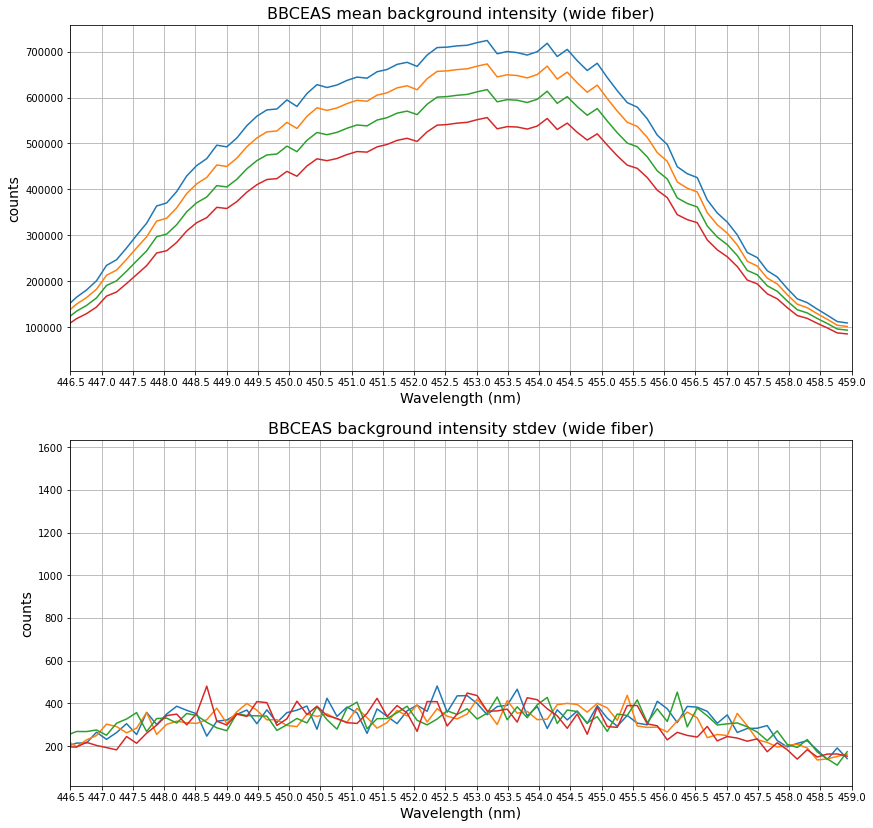

In [14]:
f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(211)

for ele in bgsw:
    ax1.plot(ele[:,0],np.average(ele[:,1:],axis=1))


ax1.set_xlim(446.5,459)
#ax1.set_ylim(1.7e-6,2.4e-6)
ax1.set_xticks(np.arange(446.5,459.5,0.5))
#ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('counts',size=14)
ax1.set_title("BBCEAS mean background intensity (wide fiber)",size=16)
plt.grid()

ax2 = f.add_subplot(212)

for ele in bgsw:
    ax2.plot(ele[:,0],np.std(ele[:,1:],axis=1))
    
ax2.set_xlim(446.5,459)
#ax1.set_ylim(1.7e-6,2.4e-6)
ax2.set_xticks(np.arange(446.5,459.5,0.5))
#ax2.legend(fontsize=12, loc='upper right')

ax2.set_xlabel('Wavelength (nm)',size=14)
ax2.set_ylabel('counts',size=14)
ax2.set_title("BBCEAS background intensity stdev (wide fiber)",size=16)
    
plt.grid()

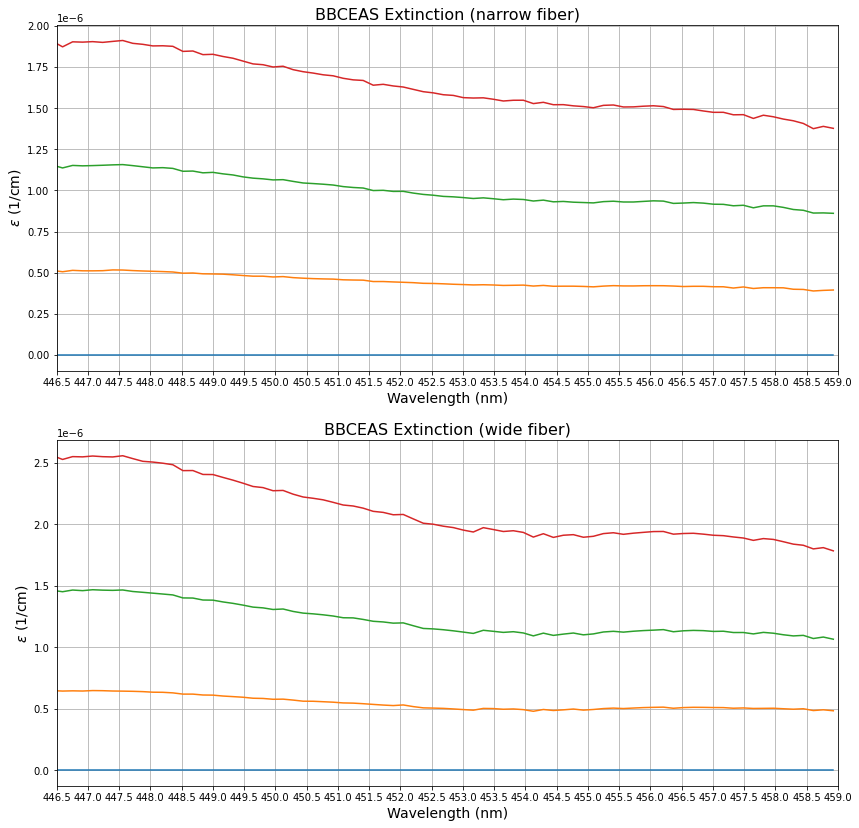

In [22]:
f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(211)
bg0n=bgsn[0]

for ele in bgsn:
    ax1.plot(ele[:,0],cf.extinction(np.average(ele[:,1:],axis=1), np.average(bg0n[:,1:],axis=1), 0.99955, 70))

ax1.set_xlim(446.5,459)
#ax1.set_ylim(1.7e-6,2.4e-6)
ax1.set_xticks(np.arange(446.5,459.5,0.5))
#ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('$\\epsilon$ (1/cm)',size=14)
ax1.set_title("BBCEAS Extinction (narrow fiber)",size=16)
plt.grid()

ax2 = f.add_subplot(212)
bg0w=bgsw[0]
              
for ele in bgsw:
    ax2.plot(ele[:,0],cf.extinction(np.average(ele[:,1:],axis=1), np.average(bg0w[:,1:],axis=1), 0.99955, 70))
    
ax2.set_xlim(446.5,459)
#ax1.set_ylim(1.7e-6,2.4e-6)
ax2.set_xticks(np.arange(446.5,459.5,0.5))
#ax2.legend(fontsize=12, loc='upper right')

ax2.set_xlabel('Wavelength (nm)',size=14)
ax2.set_ylabel('$\\epsilon$ (1/cm)',size=14)
ax2.set_title("BBCEAS Extinction (wide fiber)",size=16)
    
plt.grid()

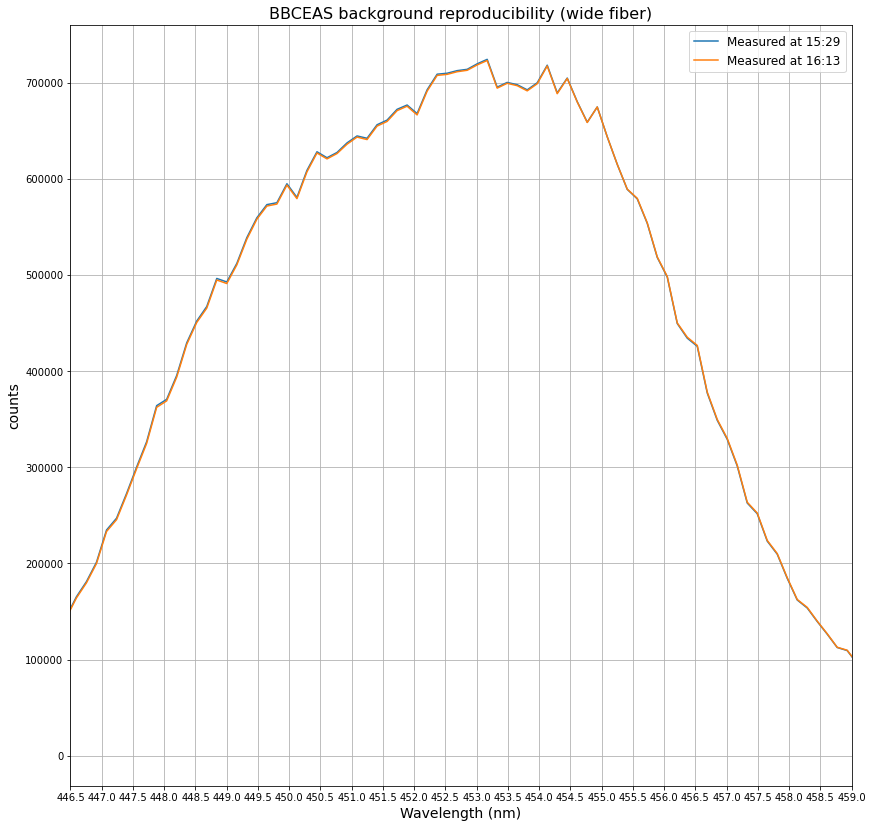

In [21]:
f = plt.figure(figsize=(14,14))
ax1 = f.add_subplot(111)


ax1.plot(bg1w[:,0],np.average(bg1w[:,1:],axis=1),label="Measured at 15:29")
ax1.plot(bg5w[:,0],np.average(bg5w[:,1:],axis=1),label="Measured at 16:13")

ax1.set_xlim(446.5,459)
#ax1.set_ylim(1.7e-6,2.4e-6)
ax1.set_xticks(np.arange(446.5,459.5,0.5))
ax1.legend(fontsize=12, loc='upper right')

ax1.set_xlabel('Wavelength (nm)',size=14)
ax1.set_ylabel('counts',size=14)
ax1.set_title("BBCEAS background reproducibility (wide fiber)",size=16)
plt.grid()